<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_HClust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Aprendizado não Supervisionado: Clustering Hierárquico**
---

Nesta trilha você vai aprender:

*   O que é como fazer clusterizações de dados com os algoritmos Clusterização Hierárquica
*   Como empregar métricas qualidade dos aglomerados

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

In [ ]:
scaler.inverse_transform(centroids)

array([[  4.87      , 114.43333333,  63.63333333,  15.94333333],
       [ 12.165     , 255.25      ,  68.4       ,  29.165     ]])

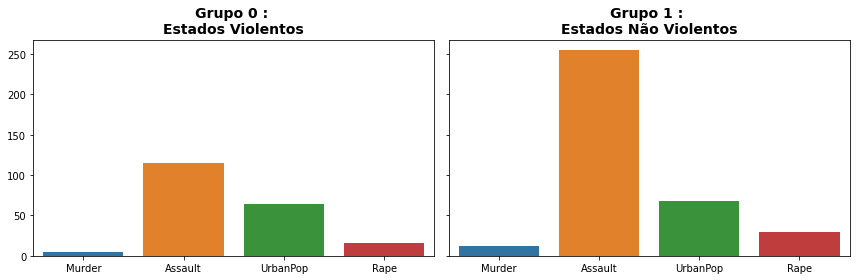

In [ ]:
g = pd.DataFrame( df.groupby('Cluster').mean() ).reset_index()

fig, ax = plt.subplots(1,2,figsize=(12,4),sharey=True)

nomes = ['Estados Violentos','Estados Não Violentos']

for i in range(len(g)):
  sns.barplot(data=g[g.Cluster==i].drop(columns='Cluster'),ax=ax[i])
  ax[i].set_title('Grupo ' + str(i) + ' : \n' + nomes[i], fontsize=14, weight='bold')

plt.tight_layout()
plt.show()



Uma vez que `Assault` é predominante buscar observar os clusters adicionando por exemplo a dimensão `UrbanPop`, embora você deva lembrar que os grupos estarão de fato *separados* apenas nas quatro dimensões. Você não deve, portanto, estranhar encontrar os estado de *Delaware* entre estados de outro grupo no gráfico.

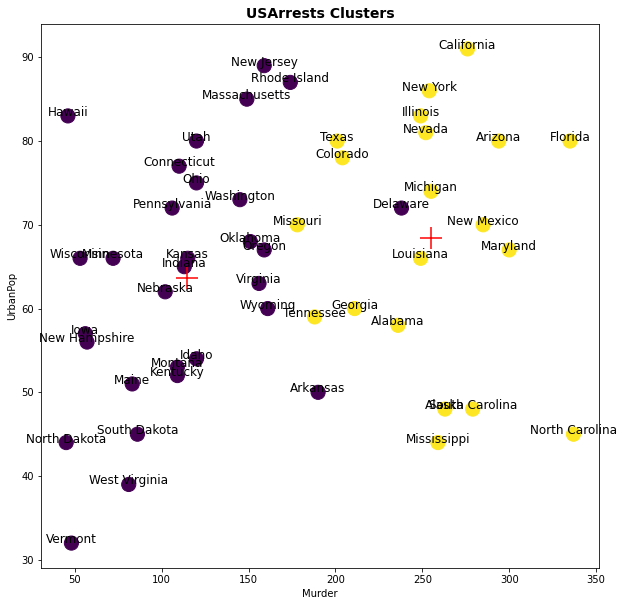

In [ ]:
f = plt.figure(figsize=(10,10))

real_centroids = scaler.inverse_transform(centroids)

plt.scatter( x = 'Assault' ,y = 'UrbanPop' , data = df , c = df.Cluster , s = 200 )
plt.scatter(x = real_centroids[: , 1] , y =  real_centroids[: , 2] , s = 500 , c = 'red' ,  marker='+')

for line in range(0,df.shape[0]):
     plt.text(df.Assault[line], df.UrbanPop[line], df.index[line],
              horizontalalignment='center',
              size='large',
              color='black')

plt.title('USArrests Clusters', fontsize=14, weight='bold')
plt.ylabel('UrbanPop') , plt.xlabel('Murder')
plt.show()

# Clustering Hierárquico

A ideia da clusterização hierárquica é a mesma do Kmédias. Mas o seu algoritmo parte de princípios bastante diferentes produzindo assim agrupamentos de dados que podem divergir bastante dependendo dos dados.  

A clusterização hierárquica busca construir uma hierarquia de clusters e existem normalmente duas estratégias:

* No *Cluster Aglomerativo* os agrupamentos são feitos de "de baixo para cima", cada amostra começa em seu próprio agrupamento, e pares de agrupamentos são organizados a medida que sobe a hierarquia.

* No *Cluster Divisivo*, a construção é "de cima para baixo", com todas as amostras começam em um cluster, e as divisões são realizadas recursivamente à medida que se desce na hierarquia dos dados.

O resultado do agrupamento hierárquico fornece uma estrutura que organiza os itens de dados em um *dendrograma*.



## Dendograma

A base para a construção do dendograma é uma matriz de distância entre todas as amostras dos dados e a  figura abaixo ilustra o procedimento de construção do Cluster Aglomerativo. Esse foi aqui adaptado de STAT 555 **Statistical Analysis of Genomics Data**. Os itens de dados aparecem no eixo $x$ e as distâncias das amostras no eixo $y$. Na construção Aglomerativa partimos dos elementos individuais (distância $0$) e vamos *lingando* os dados a partir das menores distâncias para as maiores. Assim, o par de amostras $(3,5)$ é o primeiro a ser *ligado*, pois tem a menor distância entre todos os elementos, o $1$ é ligado em seguida e assim por diante até o dendograma ligar todas as amostras dos dados. A construção pode empregar a distância euclidiana mas também qualquer ou métrica de distância.



<img src="http://meusite.mackenzie.br/rogerio/hclust1.png" width=800, align="center">

<small>
<b>
Figura 1. Fases de Construção de um Dendograma a partir de uma Matriz de Distâncias. <br></b>(Fonte:
___. STAT 555 Statistical Analysis of Genomics Data. Lesson 10: Clustering - 10.2).

## Definição  dos Clusters

Construído o Dendograma a definição dos Clusters pode ser feita estabelecendo-se um *ponto de corte* no dendograma, o que define a distância máxima que os elementos terão dentro de um agrupamento.


<img src="http://meusite.mackenzie.br/rogerio/hclust2.png" width=400, align="center">

<small>
<b>
Figura 2. Diferente Clusters são definidos a partir de um ponto de corte da Árvore do Dendograma. <br></b>(Fonte:
___. STAT 555 Statistical Analysis of Genomics Data. Lesson 10: Clustering - 10.2).

A definição do melhor número de clusters é obtido empregando os mesmo métodos do cotovelo ou de média de silhueta que você viu ao estudar o KMédias.

## Linkage

No exemplo acima, quando ligamos o elemento $1$ ao par $(3,5)$ assumimos que a distância da amostra $1$ e do par $(3,5)$ (valor $3$ na matriz) era a menor dentre todas as distâncias da amostra após a ligação do par $(3,5)$. Mas a rigor uma  função distância é definida entre dois elementos de mesmas características e não de um elemento para a um grupo. Na verdade o que empregamos acima de modo intuitivo é o que denominamos *esquema de ligação*  e que permite definir uma 'distância' entre conjuntos de dados. Os esquemas de ligação mais comuns são:

<br>

* $complete\text{_}linkage(A,B) = \{\max \, d (a, b): a \in A, \, b \in B \, \}$

* $single\text{_}linkage(A,B) = \{\min \, d (a, b): a \in A, \, b \in B \, \}$

* $average\text{_}linkage(A,B) = {\displaystyle {\frac {1} {| A | \cdot | B |}} \sum _ {a \in A} \sum _ {b \in B} d (a, b)} $

<br>

> Importante: diferentes métodos de construção (aglomerativo ou divisivo) e diferentes esquemas de ligação produzem diferentes dendogramas e, portanto, irão produzir grupos de dados diferentes na clusterização.

Abaixo os dendogramas produzidos para os esquemas de ligação `single` e `complete` linkage para o mesmo conjunto de dados do nosso exemplo.


<img src="http://meusite.mackenzie.br/rogerio/hclust3.png" width=650, align="center">

<br>
<br>

<small>
<b>
Figura 3. Esquemas de ligação diferentes, produzem Dendogramas e, consequentemente, diferentes Clusters. O dendograma à esquerda é obtido com o <i>single linkage</i>, o da direita, com o <i>complete linkage</i>. <br></b>(Fonte:
___. STAT 555 Statistical Analysis of Genomics Data. Lesson 10: Clustering - 10.2).

# CASO: Wholesale Customer Data

O dataset abaixo traz informações de um distribuidor e seus clientes e inclui os gastos anuais para diferentes produtos.

Fonte: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Queremos aqui, segmentar os fornecedores pelos produtos que oferecem.




In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv')
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

## Preparação dos Dados

Como queremos segmentar os fornecedores somente por seus produtos vamos excluir os dados de 'Channel','Region' de nossa análise e como, outros estimadores que empregam distância, vamos normalizar os dados.

In [ ]:
df = df.drop(columns=['Channel','Region'])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

X[0:10]

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       [ 0.10011141, -0.62401993, -0.3929769 ,  0.6871443 , -0.49858822,
         0.09341105],
       [ 0.84023948, -0.05239645, -0.07935618,  0.17385884, -0.23191782,
         1.29934689],
       [-0.20480553,  0.33406659, -0.29763704, -0.49615501, -0.22813824,
        -0.02622403],
       [ 0.00995035, -0.35231565, -0.10284877, -0.53451222,  0.05428041,
        -0.34785425],
       [-0.34998145, -0.11398095,  0.15535895, -0.28931479,  0.09228619,
         0.36960125],
       [-0.47790091, -0.2914094 , -0.18533618, -0.54585441, -0.2447264 ,
        -0.2750792 ],
       [-0.47449712,  0.7184949 ,  1.1514234 , -0.39448778,  0.95403053,
         0.20346113]])

## Definindo o Número de Clusters

Vamos empregar aqui apenas a técnica de média de silhueta.

In [ ]:
for n_clusters in range(2,11):
  clf = KMeans(n_clusters = n_clusters , random_state= 1984)
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para 2 clusters:  0.586
Silhueta média para 3 clusters:  0.334
Silhueta média para 4 clusters:  0.353
Silhueta média para 5 clusters:  0.369
Silhueta média para 6 clusters:  0.376
Silhueta média para 7 clusters:  0.294
Silhueta média para 8 clusters:  0.315
Silhueta média para 9 clusters:  0.326
Silhueta média para 10 clusters:  0.312


## Aglomerative Clustering

Aqui vamos aplicar o estimador de clusterização hierárquica construindo a hierarquia de forma aglomerativa.



In [ ]:
from sklearn.cluster import AgglomerativeClustering

clf = AgglomerativeClustering(n_clusters=2)
# clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
# clf = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

clf.fit(X)

# Resultados
labels = clf.labels_
print(labels)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Você pode verificar, os esquemas de ligação `single` e `complete` não levam a bons resultados e empregamos o esquema de ligação padrão do `scikit-learn`.

In [ ]:
df['Cluster'] = labels
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0


## Dendograma

Uma das vantagens da clusterização hierárquica e podermos observar diretamente a estrutura dos dados.

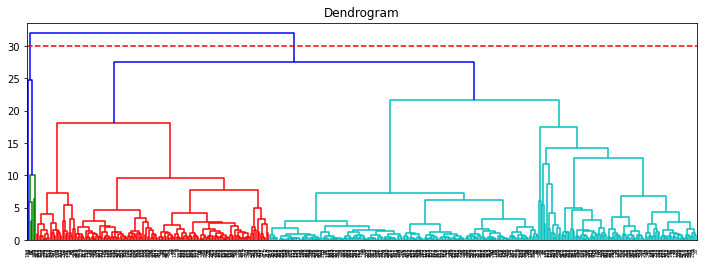

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,1,figsize=(12,4),sharey=True)

ax.set_title("Dendrogram")
plt.xticks(rotation=90)

dendrogram = shc.dendrogram(shc.linkage(X, method='ward'))
ax.axhline(y=30, color='r', linestyle='--')

plt.show()

Observando o dendograma você pode notar que 2 clusters não parece uma divisão interessante dos dados e o diagrama ainda sugere que 3 clusters teriam mais sentido para nossos dados.

Vamos então refazer a clusterização para 3 clusters.

In [ ]:
clf = AgglomerativeClustering(n_clusters=3)

clf.fit(X)

# Resultados
labels = clf.labels_
print(labels)

[2 2 2 1 1 2 2 2 1 2 2 1 1 1 1 1 2 2 1 2 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 2 1
 2 2 1 1 1 2 2 2 2 2 0 2 2 1 1 1 2 1 1 2 2 1 2 2 0 2 2 1 2 2 1 1 1 1 1 1 1
 2 1 1 2 1 1 1 2 2 1 2 0 0 1 1 1 1 1 2 1 2 1 2 1 1 1 2 2 2 1 1 1 2 2 2 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1
 1 1 1 1 1 2 1 2 2 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 2 2 1 2 1 1 2 1 1 1 2 0 1
 2 1 2 2 2 1 1 1 2 1 1 1 2 1 1 2 2 2 1 1 2 1 2 2 2 1 2 1 2 2 2 2 1 2 1 1 2
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 2 2 1 1 2 2 2 2 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1
 0 1 1 1 1 1 1 2 2 2 2 1 2 2 1 1 2 1 2 1 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 2 2 2 1 2 2 1 1 2 2 2 2 1 2 1 1 2 2 1 2 1 1 1 2 1 1 1 2 1 1 2 1 1]


In [ ]:
df['Cluster'] = labels
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1


### Análise: Tamanho dos Clusters

O grupo pequeno pode ser entendido como dados discrepantes no conjunto das amostras.

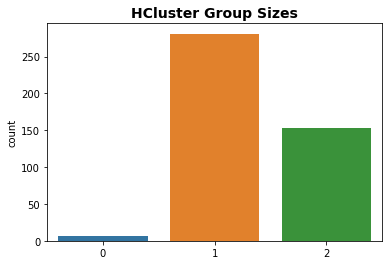

In [ ]:
sns.countplot(x=labels)
plt.title('HCluster Group Sizes', fontsize=14, weight='bold')
plt.show()

### Análise: Perfil dos Grupos

Observando o perfil dos diferentes fornecedores que nomes você atribuiria a eles?



In [ ]:
df.groupby('Cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,27477.000000,43542.166667,54588.500000,8285.666667,25018.333333,10247.833333
1,15048.932384,3017.298932,3791.761566,3837.316726,758.007117,1309.900356
2,5794.241830,9419.888889,13761.738562,1461.764706,5913.379085,1577.607843


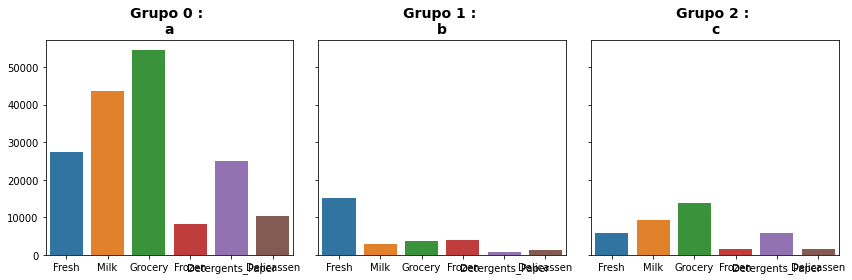

In [ ]:
g = pd.DataFrame( df.groupby('Cluster').mean() ).reset_index()

fig, ax = plt.subplots(1,3,figsize=(12,4),sharey=True)

nomes = ['a','b','c']

for i in range(len(g)):
  sns.barplot(data=g[g.Cluster==i].drop(columns='Cluster'),ax=ax[i])
  ax[i].set_title('Grupo ' + str(i) + ' : \n' + nomes[i], fontsize=14, weight='bold')

plt.tight_layout()
plt.show()



Talvez pudéssemos falar em grupo de *Grandes Fornecedores*, *Pequenos Fornecedores de Produtos Frescos* e *Pequenos Fornecedores de Produtos de Mercearia* e assim, definir estratégias de negócio diferentes para cada segmento!

# Apêndice: O gráfico de silhuetas

Os gráficos apresentam para cada elemento o seu índice de silhueta indicando a maior adequação ou não de cada elemento a cluster. A métrica de silhueta é a média desses valores.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.5909041986285453
For n_clusters = 3 The average silhouette_score is : 0.5482872649700601
For n_clusters = 4 The average silhouette_score is : 0.34573629344658097
For n_clusters = 5 The average silhouette_score is : 0.3690403826812808
For n_clusters = 6 The average silhouette_score is : 0.37432403986284685


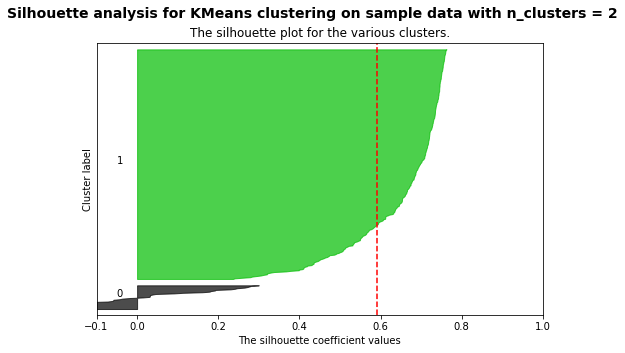

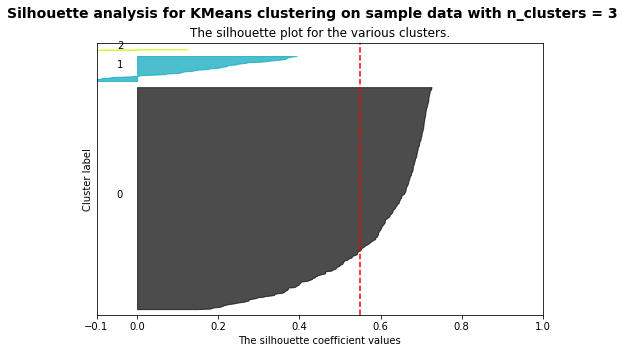

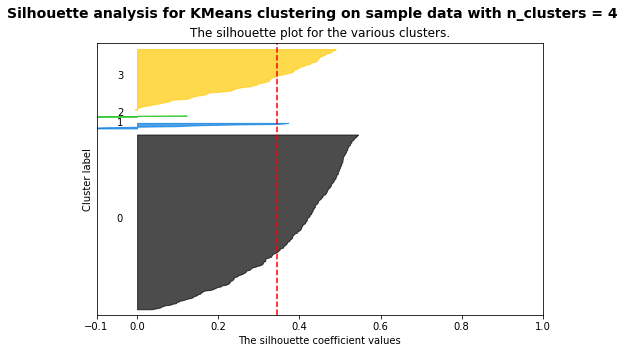

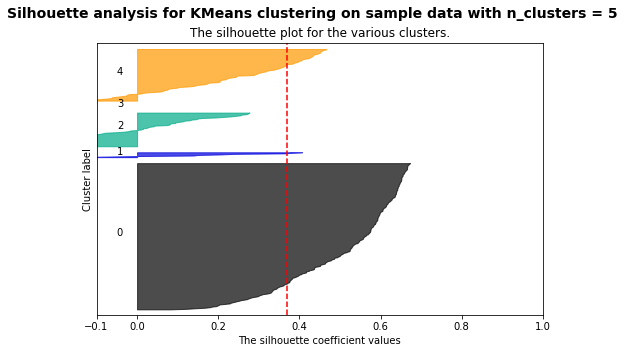

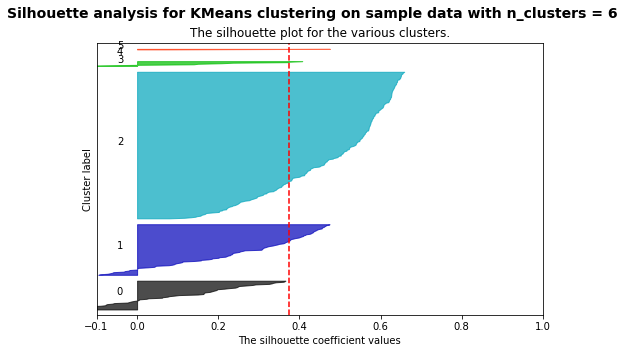

In [ ]:
# you can skip this code!

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = X

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(8, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])



    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Para Saber Mais

* Acesse **Clustering** disponível em https://scikit-learn.org/stable/modules/clustering.html para conhecer outros métodos de clusterização disponíveis e compará-los.

* Que tal experimentar a clusterização de dados com KMédias e Clusterização Hierárquica e analisar o gráfico do método do cotovelo de forma online sem qualquer programação? Legal não é? Então acesse **Online Statistics Calculator** https://datatab.net/statistics-calculator/cluster. Lá você ainda encontra um exemplo, mas poderá também importar e exportar seus próprios dados.

* Você pode também revisar nosso exemplo em 1D para o KMédias. Ele encontra-se detalhado em Sayad, Saed (2021). **An Introduction to Data Science**, disponível em https://www.saedsayad.com/clustering_kmeans.htm

* Entenda um pouco sobre mais uma técnica importante de Clustering, o DBSCAN, acessando
**DBSCAN: Density-Based Clustering Essentials** disponível em: http://www.sthda.com/english/wiki/dbscan-density-based-clustering-for-discovering-clusters-in-large-datasets-with-noise-unsupervised-machine-learning




# Referências

Alpaydin, E. **Machine Learning** (The MIT Press Essential Knowledge). The MIT Press. 2019.

Subasi, A. (2020). **Machine learning techniques. Practical Machine Learning for Data Analysis Using Python**, 91–202. doi:10.1016/b978-0-12-821379-7.00003-5

___. STAT 555 **Statistical Analysis of Genomics Data**. Lesson 10: Clustering - 10.2 - Example: Agglomerative Hierarchical Clustering. Disponível em: https://onlinecourses.science.psu.edu/stat555/node/86. Acesso em: 14 de novembro de 2021.

Sayad, Saed (2021). **An Introduction to Data Science**,
Disponível em: https://www.saedsayad.com/data_mining_map.htm Acesso: 12 de Novembro de 2021

Larose, Chantal D.; Larose, Daniel T. **Data Science Using Python and R** Hoboken: Wiley, c2019. E-book (259 p.) (Wiley Series on Methods and Applications in Data Mining Ser.). ISBN 9781119526834 (electronic bk.). Disponível em: https://www3.mackenzie.br/biblioteca_virtual/index.php?tipoBiblio=ebookcentral&flashObg=n

Kotu, Vijay; Deshpande, Balachandre **Data Science: concepts and practice**. 2nd ed. Cambridge, [England]: Morgan Kaufmann, c2019. E-book (570 p.) ISBN 9780128147627 (electronic bk.). Disponível em: http://pergamum.mackenzie.br:8080/pergamumweb/vinculos/00003c/00003cef.jpg.


